- ✨Linear regression with transformed targets :
 is a clever technique used in binary classification tasks. Here's a concise overview:

1. **Transformation**: The target variable, representing class probabilities, is transformed using functions like the logit transformation, mapping probabilities to a continuous range.

2. **Training**: A standard linear regression model is trained using the transformed target variable, learning the relationship between features and transformed probabilities.

3. **Prediction**: The model predicts continuous values representing transformed probabilities for new data points.

4. **Inverse Transformation**: These predictions are then converted back to probabilities using the inverse transformation function.

5. **Thresholding**: Applying a threshold classifies instances into binary labels based on probabilities.

6. **Evaluation**: Model performance is assessed using standard classification metrics.

This method offers an elegant way to adapt regression techniques for classification tasks, though it's important to be mindful of its limitations and explore other approaches for comparison.

![My Image](LR_EXAMPLE.png)

Import Libraries

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Implementation From scratch

In [12]:
def sigmoid (b0 , b1 , x):    # output == probability
    z = b0 + b1 * x
    return 1 / (1+np.exp(-z))

def cost_function(b0 , b1 , x , y): 
    y_hat = sigmoid(b0,b1,x)
    m = x.shape[0]    # size of data
    loss = -1/m * sum(y * np.log(y_hat) + (1-y) * np.log (1-y_hat))
    return loss

def gradient_descent(alpha, iterations, x, y):
    m = x.shape[0]
    b0,b1 = 0,0    # initial values
    for i in range(iterations):
        y_hat = sigmoid(b0, b1, x)
        b0 = b0 - alpha/m * np.sum(y_hat - y )
        b1 = b1 - alpha/m * np.sum((y_hat - y) * x)
    return b0 , b1

def predict (b0, b1, x):    # obtimal values for each point
    return sigmoid(b0, b1 , x)


Laoding data 

In [13]:
data = pd.read_csv("exams.csv")
data

,score,admission
0,34.62,0
1,44.56,0
2,33.36,0
3,39.74,1
4,58.83,1
...,...,...
108,49.15,1
109,54.96,1
110,48.72,1
111,42.28,0


Visualization

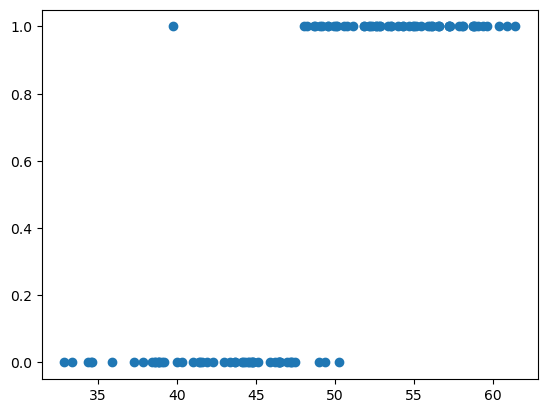

In [14]:
x = data[["score"]]
y = data["admission"]

plt.scatter(x,y)

Build Model 

In [15]:
model = LinearRegression()
model.fit(x,y)


LinearRegression()

Check accurecy

In [16]:
model.score(x,y)

0.6606640967853317

Linear Regreesion in classification problem

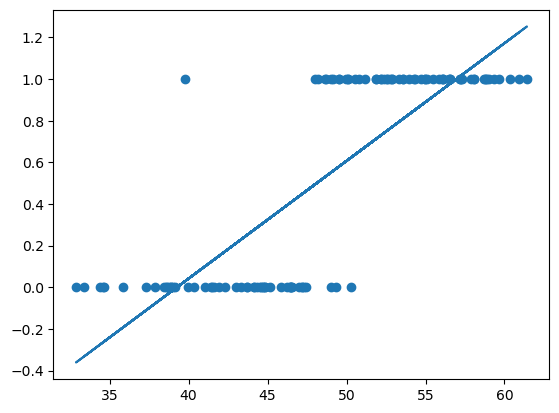

In [17]:
y_hat = model.predict(x) 
plt.scatter(x,y) 
plt.plot(x,y_hat)

Clip to handle range from 0 to 1 

In [18]:
y_hat = np.where(y_hat > 1 ,1 ,y_hat)
y_hat = np.where(y_hat <0, 0, y_hat)

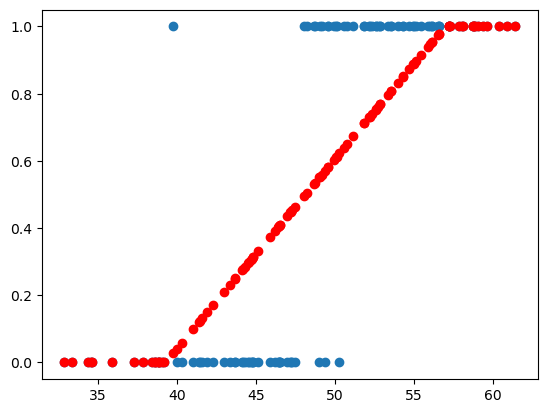

In [19]:
plt.scatter(x,y) 
plt.scatter(x,y_hat,c="red")

Probability

In [20]:
print(sigmoid(0,1,0))

0.5


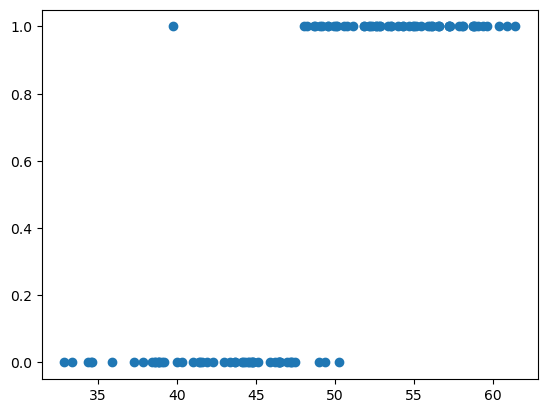

In [21]:
x = data["score"]
y = data["admission"]

plt.scatter(x,y)

Get best betas values using gradient descent

In [22]:
b0, b1 = gradient_descent(alpha = .01, iterations=100000, x=x , y= y)
print(b0 , b1)


-25.098244871525047 0.5207440036409487


In [23]:
y_hat = predict(b0,b1, x)
y_hat

0      0.000849
1      0.130801
2      0.000441
3      0.012082
4      0.996078
         ...   
108    0.621595
109    0.971303
110    0.567683
111    0.043890
112    0.168392
Name: score, Length: 113, dtype: float64

Visualization

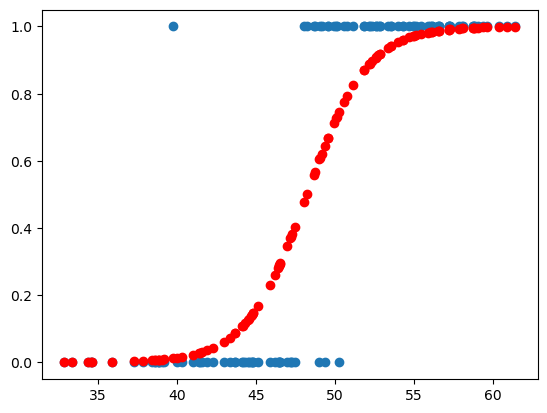

In [24]:
plt.scatter(x,y)
plt.scatter(x,y_hat , c="red")

In [25]:
def sigmoid(x, betas):
    z = x.dot(betas)
    z = np.clip(z, -500,500)    #to handle overflow لانى بقيت فى منطقة التأكد خلاص مش هحتاج اشوف  الباقى تانى 
    return 1 / (1+np.exp(-z))

def cost_function(x, y, betas):
    m = x.shape[0]
    x_bias = np.ones((m, 1))
    x = np.c_[x_bias, x]
    y_hat = sigmoid(x, betas)
    y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)   # to handle log (0)
    loss = -1/m * (y.T.dot(  np.log(y_hat)) + (1-y).T.dot( np.log (1-y_hat)))
    return loss

def gradient_descent(alpha, iterations, x, y):
    m = x.shape[0]
    x_bias = np.ones((m,1))
    x = np.c_[x_bias, x]
    k = x.shape[1]
    betas = np.random.randn(k,1)
    for i in range(iterations):
        y_hat = sigmoid(x, betas)
        betas = betas - alpha/ m * (x.T.dot(y_hat - y))
    return betas

def log_likelihood(y, y_hat):
    return y.T.dot(np.log(y_hat)) + (1-y).T.dot(np.log (1-y_hat))

def r_squared(ll_total, ll_fit):
    return (ll_total - ll_fit) / ll_total
    
def predict (x, betas):
    m = x.shape[0]
    x_bias = np.ones((m, 1))
    x = np.c_[x_bias, x]
    return sigmoid(x, betas)

In [26]:
data = pd.read_csv("Social_Network_Ads.csv")   # customer will buy or not 
data 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [27]:
scaler = StandardScaler()
x = data[["Age", "EstimatedSalary"]]
x = scaler.fit_transform(x)
y = data[["Purchased"]]

In [29]:
betas = gradient_descent(alpha=0.01 , iterations=10000 , x = x , y = y)
betas

array([[-1.11252867],
       [ 2.37833062],
       [ 1.19037576]])

In [30]:
y_hat = predict(x,betas)
print(cost_function(x , y ,betas))

                  0
Purchased  0.346397


In [31]:
y_hat = predict(x, betas)
ll_fit = log_likelihood(y,y_hat)
y_hat_total = np.ones_like(y_hat) * y.mean().values    # array of mean >> (1*maean(y))
ll_total = log_likelihood(y, y_hat_total)

In [33]:
score = r_squared(ll_total , ll_fit)
print(score) 

                  0
Purchased  0.468689
